In [18]:
import numpy as np
import pandas as pd
import csv
import os, sys, random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats.distributions import uniform, expon, norm
from statsmodels.distributions.empirical_distribution import ECDF

# Anatomical Abnormalities Associated with Schizophrenia

## Task 1 ##
Load the data file, find two observed data groups and separate them. Describe these two data groups. For each group find mean, variance and median.

In [2]:
# Data read from CSV and saved to various variables

df = pd.read_csv("../data/data.csv", delimiter=";")

# Dataframes
af = df["Affected"]
un = df["Unaffected"]

# NumPy arrays
af_np = np.array(af)
un_np = np.array(un)

# Lists
af_list = list(af)
un_list = list(un)

In [3]:
# Additional helper values required during the computations

# Sizes of the supplements
af_size = len(af_list)
un_size = len(un_list)

# Upper and Lower bounds of values of each supplement
af_lb = math.floor(min(af_list))
af_ub = math.ceil(max(af_list))

un_lb = math.floor(min(un_list))
un_ub = math.ceil(max(un_list))

print('Size of the af supplement:', af_size)
print('Lower bound:', af_lb)
print('Upper bound:', af_ub)

print()

print('Size of the un supplement:', un_size)
print('Lower bound:', un_lb)
print('Upper bound:', un_ub)

Size of the af supplement: 15
Lower bound: 1
Upper bound: 3

Size of the un supplement: 15
Lower bound: 1
Upper bound: 3


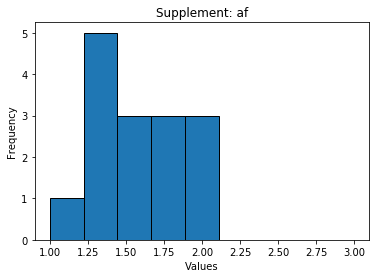

Mean: 1.5599999984105428
Variance: 0.08470666817983077
Median: 1.5900000333786002


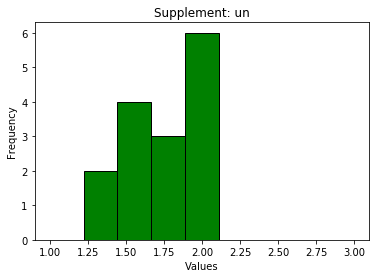

Mean: 1.7586666504542028
Variance: 0.054851546121810896
Median: 1.7699999809265101


In [4]:
# Setting parameters for the histogram describing supplement af

plt.hist(af_np, 9, (af_lb,af_ub), edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: af')
plt.show()

# Calculating mean, variance and median of supplement af

af_mean = np.mean(af_np)
af_var = np.var(af_np)
af_median = np.median(af_np)

print("Mean:", af_mean)
print("Variance:", af_var)
print("Median:", af_median)

# Setting parameters for the histogram describing supplement un

plt.hist(un_np, 9, (un_lb,un_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: un')
plt.show()

# Calculating mean, variance and median of supplement un

un_mean = np.mean(un_np)
un_var = np.var(un_np)
un_median = np.median(un_np)

print("Mean:", un_mean)
print("Variance:", un_var)
print("Median:", un_median)

## Task 2

For each group try to find probability density function (based on histogram) and distribution function (based on ecdf).

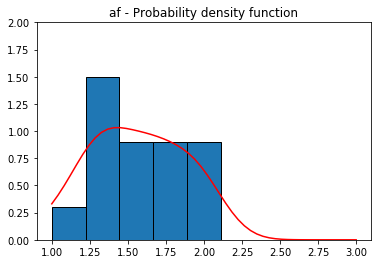

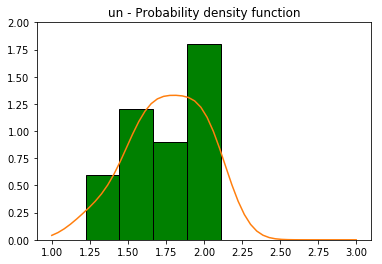

In [5]:
# Non-parametric probability density function of af

nparam_density = stats.kde.gaussian_kde(af.values.ravel())
x = np.linspace(af_lb, af_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(af.values, 9, (af_lb,af_ub), density=True, edgecolor = 'black')
ax.plot(x, nparam_density, color = 'r')
ax.set_ylim([0, 2])
plt.title('af - Probability density function')
plt.show()

# Non-parametric probability density function of un

nparam_density = stats.kde.gaussian_kde(un.values.ravel())
x = np.linspace(un_lb, un_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(un.values, 9, (un_lb,un_ub), density=True, facecolor = 'g', edgecolor = 'black')
ax.plot(x, nparam_density)
ax.set_ylim([0, 2])
plt.title('un - Probability density function')
plt.show()

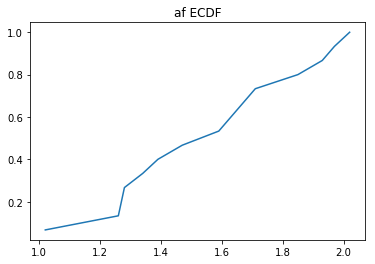

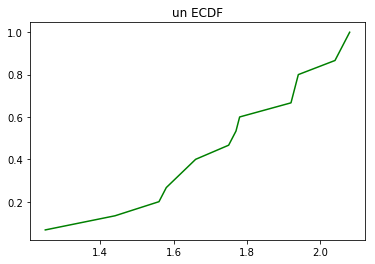

In [6]:
# Empiric distribution function fo af

ecdf = ECDF(af_np)
plt.plot(ecdf.x, ecdf.y)
plt.title('af ECDF')
plt.show()

# Empiric distribution function fo un

ecdf = ECDF(un_np)
plt.plot(ecdf.x, ecdf.y, color = 'g')
plt.title('un ECDF')
plt.show()

## Task 3 ##

* For each group find probability distribution.
   1. Approximate parameters of normal, exponential and uniform distribution.
   2. Add appropriate probability density functions (PDF) with estimated parameters to the histogram graphs.
   3. Discuss which of the distribution is best to reflect observed data.

### Approximate parameters of normal, exponential and uniform distribution ###

#### Normal distribution ####

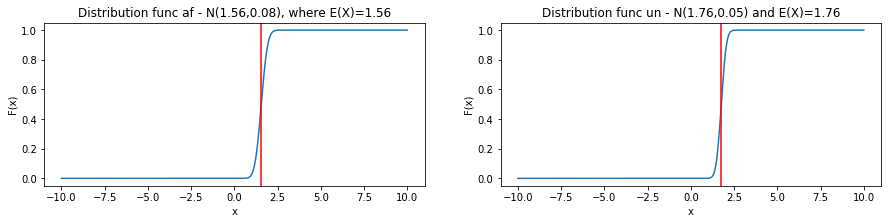

In [7]:
af_sigma = np.sqrt(af_var)
un_sigma = np.sqrt(un_var)

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
x = np.linspace(-10, 10, 1000)
plt.plot(x, norm.cdf(x, loc=af_mean, scale=af_sigma))
plt.axvline(af_mean, color='r')
plt.title('Distribution func af - N({0:.2f},{1:.2f}), where E(X)={2:.2f}'.format(af_mean, af_var, af_mean))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, norm.cdf(x, loc=un_mean, scale=un_sigma))
plt.axvline(un_mean, color='r')
plt.title('Distribution func un - N({0:.2f},{1:.2f}) and E(X)={2:.2f}'.format(un_mean, un_var, un_mean))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

#### Exponential distribution ####

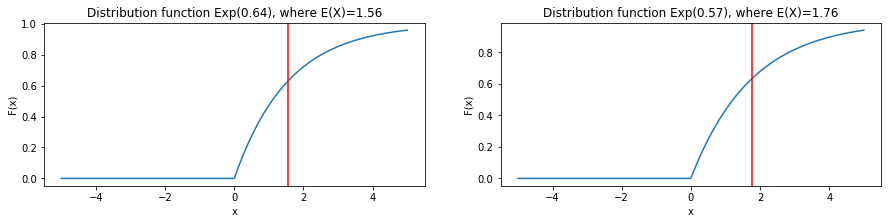

In [8]:
af_lambda = 1 / af_mean
un_lambda = 1 / un_mean

plt.figure(figsize=(15,3))
x = np.linspace(-5, 5, 1000)

plt.subplot(1,2,1)
plt.plot(x, expon.cdf(x, scale=af_mean))
plt.axvline(expon.mean(scale=af_mean), color='r')
plt.title('Distribution function Exp({0:.2f}), where E(X)={1:.2f}'.format(af_lambda, expon.mean(scale=af_mean)))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, expon.cdf(x, scale=un_mean))
plt.axvline(expon.mean(scale=un_mean), color='r')
plt.title('Distribution function Exp({0:.2f}), where E(X)={1:.2f}'.format(un_lambda, expon.mean(scale=un_mean)))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

#### Uniform distribution ####

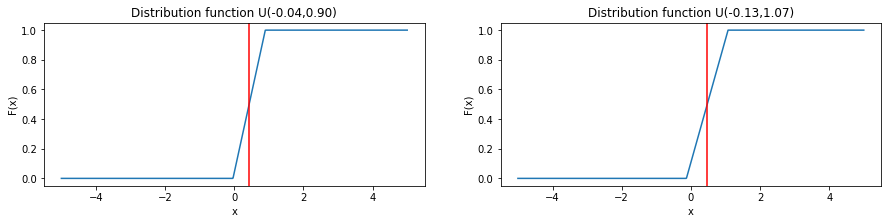

In [9]:
af_x = uniform.rvs(size=af_size)
af_m1 = af_x.mean()
af_m2 = np.mean(af_x**2)
af_a = af_m1 - np.sqrt(3 * (af_m2 - af_m1**2))
af_b = af_m1 + np.sqrt(3 * (af_m2 - af_m1**2))
af_scale = np.abs(af_b-af_a)

un_x = uniform.rvs(size=un_size)
un_m1 = un_x.mean()
un_m2 = np.mean(un_x**2)
un_a = un_m1 - np.sqrt(3 * (un_m2 - un_m1**2))
un_b = un_m1 + np.sqrt(3 * (un_m2 - un_m1**2))
un_scale = np.abs(un_b-un_a)

x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.plot(x, uniform.cdf(x, af_a, scale=af_scale))
plt.axvline(uniform.mean(af_a, scale=af_scale), color='r')
plt.title('Distribution function U({0:.2f},{1:.2f})'.format(af_a, af_b))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, uniform.cdf(x, un_a, scale=un_scale))
plt.axvline(uniform.mean(un_a, scale=un_scale), color='r')
plt.title('Distribution function U({0:.2f},{1:.2f})'.format(un_a, un_b))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

### Add appropriate probability density functions (PDF) with estimated parameters to the histogram graphs ###

#### Normal distribution ####

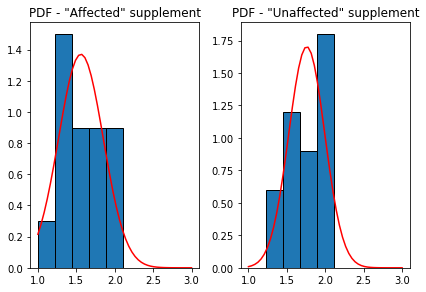

In [10]:
x = np.linspace(af_lb, af_ub)
fig, axs = plt.subplots(1, 2)

fig.tight_layout()

density = norm.pdf(x, loc=af_mean, scale=af_sigma)
axs[0].hist(af.values, 9, (af_lb,af_ub), density=True, edgecolor = 'black')
axs[0].plot(x, density, color = 'r')
axs[0].set_title('PDF - "Affected" supplement')

x = np.linspace(un_lb, un_ub)

density = norm.pdf(x, loc=un_mean, scale=un_sigma)
axs[1].hist(un.values, 9, (un_lb,un_ub), density=True, edgecolor = 'black')
axs[1].plot(x, density, color = 'r')
axs[1].set_title('PDF - "Unaffected" supplement')

plt.show()

#### Exponential distribution ####

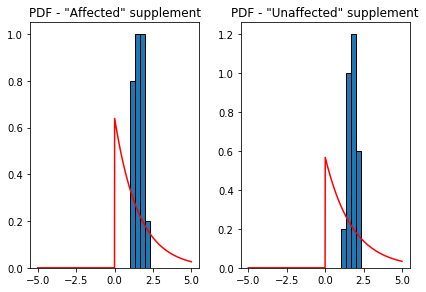

In [11]:
x = np.linspace(-5, 5, 1000)
fig, axs = plt.subplots(1, 2)

fig.tight_layout()

density = expon.pdf(x, scale=af_mean)
axs[0].hist(af.values, 6, (af_lb,af_ub), density=True, edgecolor = 'black')
axs[0].plot(x, density, color = 'r')
axs[0].set_title('PDF - "Affected" supplement')

density = expon.pdf(x, scale=un_mean)
axs[1].hist(un.values, 6, (un_lb,un_ub), density=True, edgecolor = 'black')
axs[1].plot(x, density, color = 'r')
axs[1].set_title('PDF - "Unaffected" supplement')

plt.show()

#### Uniform distribution ####

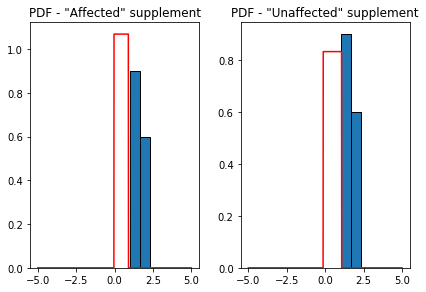

In [12]:
x = np.linspace(-5, 5, 1000)
fig, axs = plt.subplots(1, 2)

fig.tight_layout()

density = uniform.pdf(x, af_a, scale=af_scale)
axs[0].hist(af.values, 3, (af_lb,af_ub), density=True, edgecolor = 'black')
axs[0].plot(x, density, color = 'r')
axs[0].set_title('PDF - "Affected" supplement')

density = uniform.pdf(x, un_a, scale=un_scale)
axs[1].hist(af.values, 3, (un_lb,un_ub), density=True, edgecolor = 'black')
axs[1].plot(x, density, color = 'r')
axs[1].set_title('PDF - "Unaffected" supplement')

plt.show()

### Discuss which of the distribution is best to reflect observed data ###

We concluded that it will be ideal to use normal distribution for our case. The main reason for this decision is a fact that we are working with social science data and we want to represent real-valued random variables whose distributions are not known. Normal distributions are oftened used in natural and social sciences so we concluded that it will fit the best our needs.

## Task 4 ##

For each group generate random 100 samples using distribution you choosed as the most suitable, with parametres you estimated before. Compare histogram of simulated values with observed values.


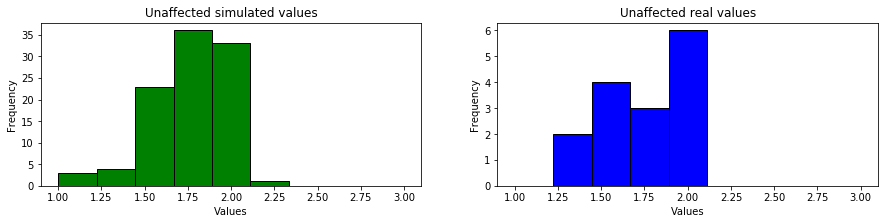

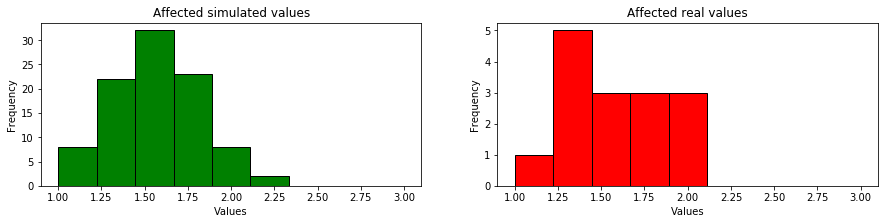

In [13]:
gen_af = np.random.normal(af_mean, af_sigma ,100)
gen_un = np.random.normal(un_mean ,un_sigma ,100)

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.hist(gen_un, 9, (un_lb,un_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Unaffected simulated values')

plt.subplot(1,2,2)
plt.hist(un_np, 9, (un_lb,un_ub), facecolor = 'b', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Unaffected real values')

plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.hist(gen_af, 9, (af_lb,af_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Affected simulated values')

plt.subplot(1,2,2)
plt.hist(af_np, 9, (af_lb,af_ub), facecolor = 'r', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Affected real values')

plt.show()

## Task 5 ##
For each group calculate 95% confidence interval for EX 

In [14]:
def confidence_interval(Xn, sigma):
    n = 15
    alpha = 0.05

    critical_value = norm.isf(alpha/2)

    delta = critical_value * sigma / np.sqrt(n)
    ci = np.array([Xn - delta, Xn + delta])
    return ci
    
print("Confidence interval of Affected:", confidence_interval(af_mean, af_sigma))
print("Confidence interval of Unaffected:", confidence_interval(un_mean, un_sigma))

Confidence interval of Affected: [1.41271407 1.70728593]
Confidence interval of Unaffected: [1.64014522 1.87718808]


## Task 6 ##
For each group do two-tailed test of hypothesis EX = K on significance level 5%. 
A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

### Approach ###

We are testing, on the 5 % significance level, whether the mean is equal to the given K. K has to lie in the confidence interval of the particular sample mean to accept the hypothesis that it is equal to the sample mean.

We can use `ttest_1samp` function, from the module `SciPy`, which satisfies our needs. We are looking on the resulting probability and if this probability is less than our given alpha, then we can accept the hypothesis otherwise we reject it.

We will use results of the confidence intervals from the previous task.


$ H_0 : EX = K $

$ H_A : EX \ne K $

$ \alpha = 0,05 $

In [24]:
k = 4
alpha = 0.05

af_pvalue = ttest_1samp(af, k)[1]
un_pvalue = ttest_1samp(un, k)[1]

if af_pvalue < alpha:
    print('We reject hypothesis H0 for the "Affected" sample because K = 4 does not lie in confidence interval [1.41271407 1.70728593].')
else:
    print('We accept hypothesis H0 for the "Affected" sample because K = 4 lies in confidence interval [1.41271407 1.70728593].')

print()    

if un_pvalue < alpha:
    print('We reject hypothesis H0 for the "Unaffected" sample because K = 4 does not lie in confidence interval [1.64014522 1.87718808].')
else:
    print('We accept hypothesis H0 for the "Unaffected" sample because K = 4 lies in confidence interval [1.64014522 1.87718808].')

We reject hypothesis H0 for the "Affected" sample because K = 4 does not lie in confidence interval [1.41271407 1.70728593].

We reject hypothesis H0 for the "Unaffected" sample because K = 4 does not lie in confidence interval [1.64014522 1.87718808].


## Task 7 ##

Test whether the observed groups have the same mean on the 5 % significance level. Specify types of tests and alternatives so your choice will be the best to correspond with character of investigated problem.

### Approach ###

We are testing, on the 5 % significance level, whether the mean from the first sample confidence interval lies in the confidence interval of the second sample and analogically for the second sample mean.

Both of the means have to lie in the confidence interval of the other mean, on the 5 % significance level, otherwise we are rejecting the hypothesis that the means are equal in a favor of hypothesis that they are not.

For this purpose, we can use `ttest_ind` function, from the `module SciPy`, which directly tests this hypothesis in both directions. 

In [20]:
alpha = 0.05
pvalue = ttest_ind(af, un)[1]

if pvalue < alpha:
    print('The probablity value is less than or equal to our alpha so we can reject this hypothesis, on the 5 % level of significance, in favor of hypothesis that means are equal.')
else:
     print('The probablity value is greater than our alpha so we are not rejecting the hypothesis, on the 5 % level of significance, that the means are equal.')

The probablity value is greater than our alpha so we are not rejecting the hypothesis, on the 5 % level of significance, that the means are equal.
